### Introduction to Neural Network Regression in Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-02-24 21:37:20.145534: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**5) Evaluating the model**

**Typical practice:**
* Build--> fit--> evaluate it--> tweak model--> fit -->evaulate it-->.... until we get a reliable model
* visualize - visualize - visualize
  * Visualize how the data looks like?
  * Visualize how the model itself looks like?
  * Visualize how the model performs while it learns (trains)?
  * Visualize the predictions, how they line up with the ground truth? 
* We also do a train-validate-test split

**Custom Data**

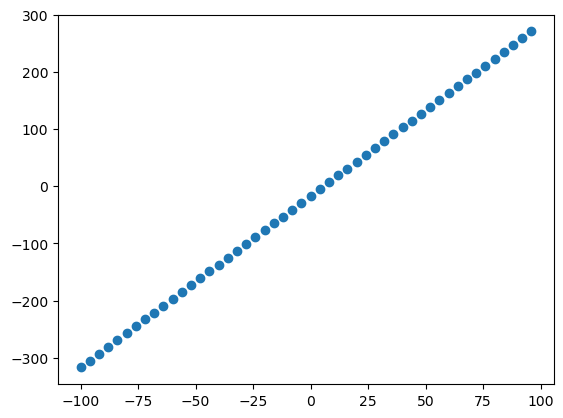

In [2]:
X=tf.range(-100,100,4)
y= 3*X-17
X,y

# visualize the data
plt.scatter(X,y)
plt.show()

**6) Train-Validate-Test Split**
* Training data is usually 70-80 percent of actual data
* Testing data is usually 20-30 percent of actual data
* Training data is further split into Train - Validation (usually 10-15 percent of training data)

-- Helps in generalization

**`tf.gather(params, indices, axis=0, batch_dims=0)`**
<br><br>
Arguments:
* `params`: The input tensor from which elements are gathered.
* `indices`: A tensor containing indices that specify which elements to select.
* `axis` (optional, default=0): The axis along which to gather the values.
* `batch_dims` (optional, default=0): Used for batched indexing, but in most simple cases, this remains 0.

In [3]:
# Input tensor
a = tf.constant([10, 20, 30, 40, 50])

# Indices to gather
indices = tf.constant([3, 0, 4])

# Gather elements from a using the specified indices
result = tf.gather(a, indices)

print(result.numpy())  # Output: [40, 10, 50]

[40 10 50]


In [4]:
def train_test_split(X,y,train_percent=0.7,valid_percent=0.15,details=False,shuffle=True,seed=14):
    if shuffle:
        tf.random.set_seed(seed)
        indices = tf.random.shuffle(tf.range(tf.shape(X)[0]))
        X = tf.gather(X, indices)
        y = tf.gather(y, indices)

    # train-test split:
    X_Train=X[:int(train_percent*len(X))]
    X_test=X[int(train_percent*len(X)):]
    y_Train=y[:int(train_percent*len(y))]
    y_test=y[int(train_percent*len(y)):]

    # train-valid split:
    X_train=X_Train[int(valid_percent*len(X_Train)):]
    X_valid=X_Train[:int(valid_percent*len(X_Train))]
    y_train=y_Train[int(valid_percent*len(y_Train)):]
    y_valid=y_Train[:int(valid_percent*len(y_Train))]

    # printing details:
    if details:
        print(f"Training data shape:{X_train.shape}")
        print(f"Training label shape:{y_train.shape}")
        print(f"Validation label shape:{y_valid.shape}")
        print(f"Validation data shape:{X_valid.shape}")
        print(f"Testing data shape:{X_test.shape}")
        print(f"Testing label shape:{y_test.shape}")

    return X_train,X_valid,X_test,y_train,y_valid,y_test


# splitting data into train and test
X_train,X_valid,X_test,y_train,y_valid,y_test=train_test_split(X,y,details=True,train_percent=0.8,valid_percent=0.0)

Training data shape:(40,)
Training label shape:(40,)
Validation label shape:(0,)
Validation data shape:(0,)
Testing data shape:(10,)
Testing label shape:(10,)


**7) Visualizing the data**

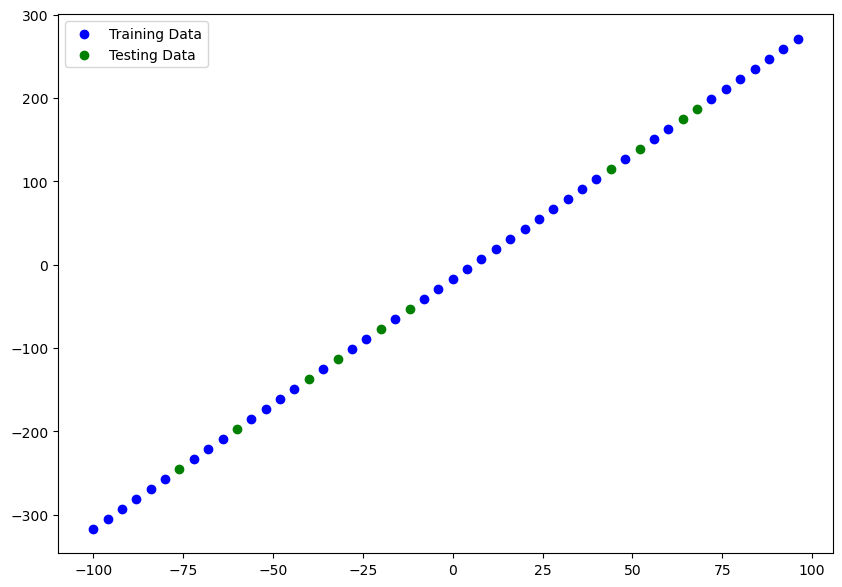

In [5]:
plt.figure(figsize=(10,7))
# plotting training data
plt.scatter(X_train,y_train,c='b',label='Training Data')
# plotting test data
plt.scatter(X_test,y_test,c='g',label="Testing Data")
# showing a legend 
plt.legend()
plt.show()

In [19]:
# setting the random seed
tf.random.set_seed(42)

# 1. creating model using sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
     
],name="My_first_model")

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**8) Visualizing the model**
* model needs to be built
* Dense is another word for fully connected layer
* `total params`: total number of parameters in the model.
* `trainable params`: these are the parameters(patterns) the model can update as it trains
* `trainable params`: these are the parameters(patterns) that are not updated while training, typically when we perform **transfer learning**, we freeze some parameters.

In [20]:
model.summary()

Model: "My_first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

**Notes:**
* verbose=0 --> silent
* verbose=1 --> progress bar
* verbose=2 --> one line per epoch

In [21]:
# 3. fitting the model
model.fit(tf.expand_dims(X_train,-1),y_train, epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 111.6732 - mae: 111.6732 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 100.7078 - mae: 100.7078
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 53.0058 - mae: 53.0058
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 65.7072 - mae: 65.7072
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 69.0813 - mae: 69.0813
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 72.8240 - mae: 72.8240
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 53.3029 - mae: 53.3029
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 66.4739 - mae: 66.4739
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 70.3075 - mae: 70.3075
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 73.5329 - mae: 73.5329
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 54.1991 - mae: 54.1991
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 67.2574 - mae: 67.2574
Epoch 13/100
2/2 ━━━

**plotting model**

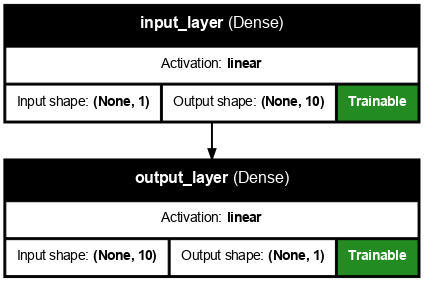

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(
    model=model,
    show_dtype=False,
    show_shapes=True, 
    rankdir='TB',  # 'TB' for top-to-bottom layout, 'LR' for left-to-right
    show_layer_names=True,  # Optional: Shows layer names
    dpi=70,  # Reduce DPI to make it smaller
    expand_nested=True,  # Optional: Expands nested models if present
    show_layer_activations=True,
    show_trainable=True,
    # to_file='model.png' # File name of the plot image,
)

***-- CONTD IN NEXT NOTEBOOK --***